In [2]:
import warnings
warnings.filterwarnings('ignore') # warnings are for the weak

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

import os
import sys
import re
import sys

import fna

import pipeline as pipeline

sys.path.append("../demyelination/") # we need this to successfully read pickle files
sys.path.append("../") # we need this to successfully read pickle files

In [5]:
def firingRates(p, timeslice, heading):
    print(
        heading,
        "\nMGN Stim, MGN Non Stim, eA1 Stim, eA1 Non Stim \n",
        p.spikeobj['MGN'].time_slice(timeslice[0], timeslice[1]).id_slice(np.arange(1, 100)).mean_rate(),
        p.spikeobj['MGN'].time_slice(timeslice[0], timeslice[1]).id_slice(np.arange(101, 500)).mean_rate(),
        p.spikeobj['eA1'].time_slice(timeslice[0], timeslice[1]).id_slice(np.arange(1001, 1400)).mean_rate(),
        p.spikeobj['eA1'].time_slice(timeslice[0], timeslice[1]).id_slice(np.arange(1401, 3000)).mean_rate()
    )

## recurr-trn
baseline.py <br />
Reproduction of input from Barna

In [56]:
files = pipeline.readfiles("../demyelination/data/recurr-trn/activity/");
df = pipeline.preparestimdf(files)

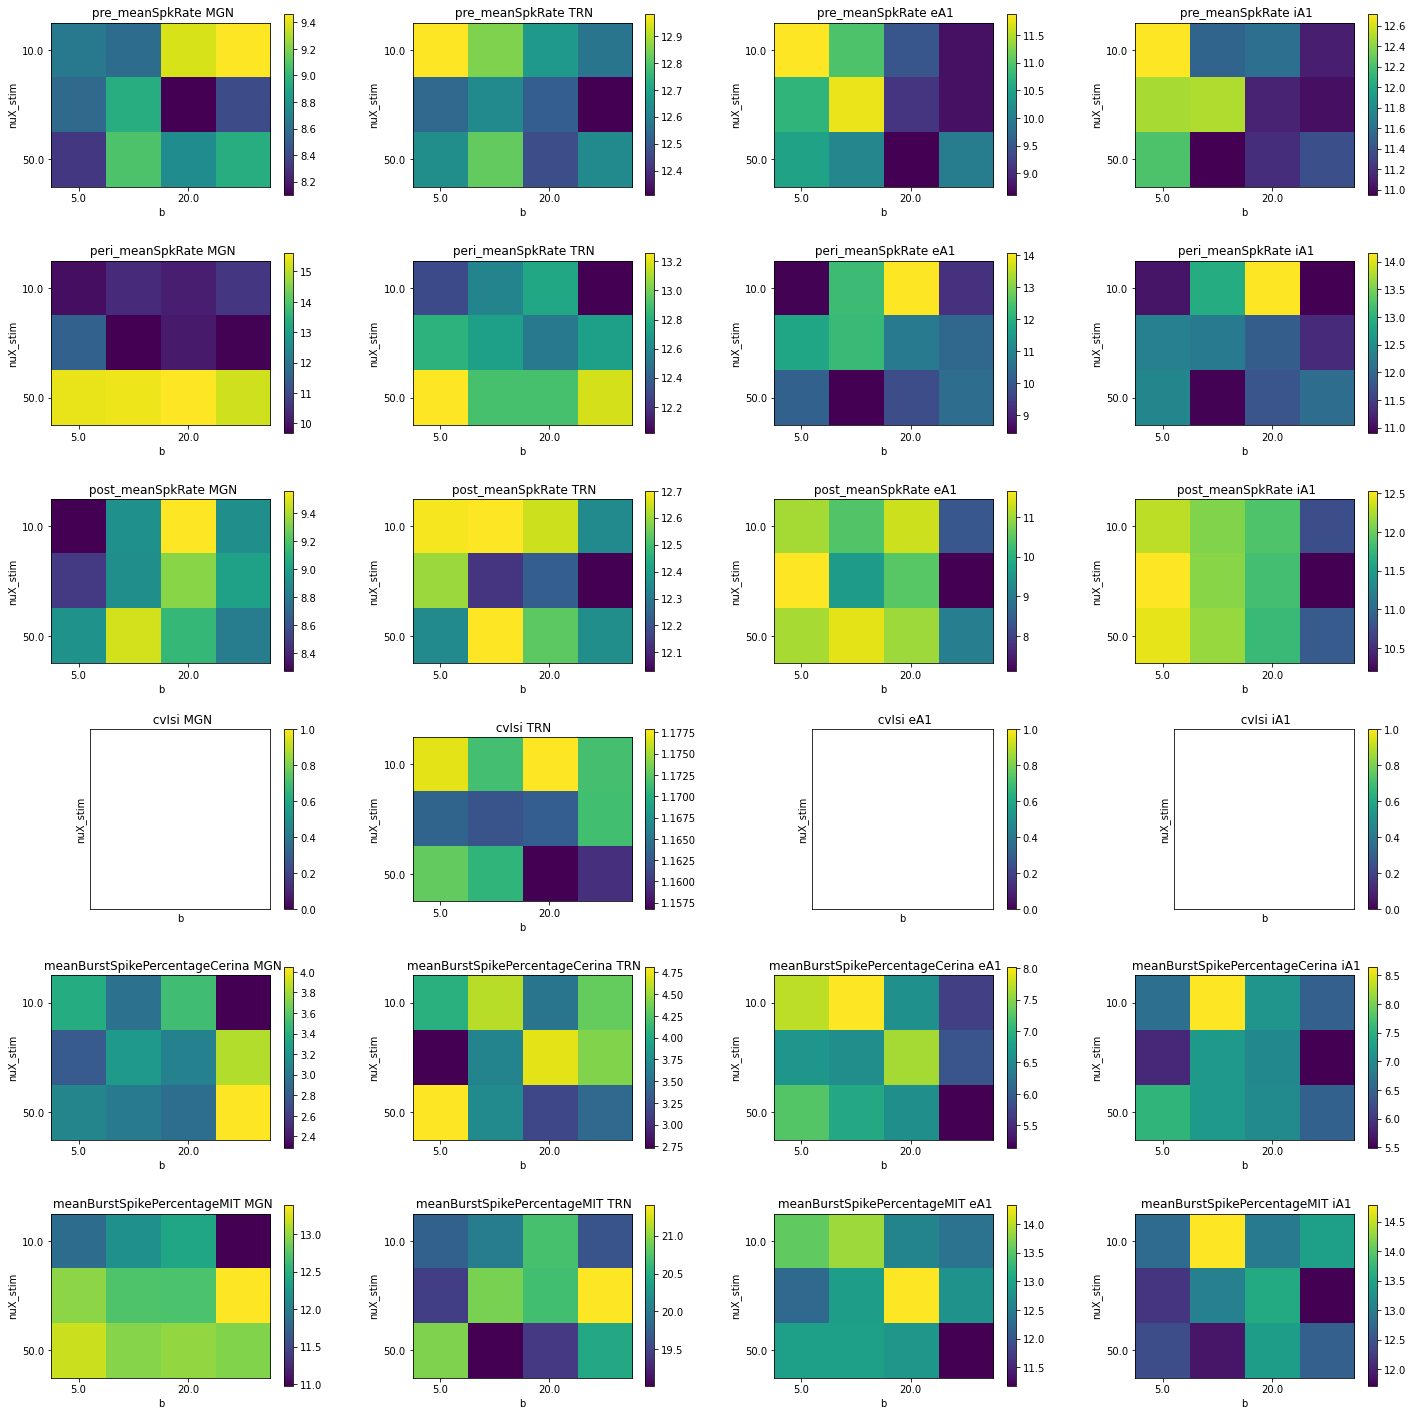

In [64]:
fig, ax = plt.subplots(nrows=6, ncols=4)

fig.set_size_inches(20, 20)
plt.subplots_adjust(left=0.01, right=0.03, top=0.03, bottom=0.02)

# dfFilter = df.nuX_stim == 10
dfFilter = [True] * df.shape[0]

varone = "nuX_stim"
vartwo = "b"

parts = ["MGN", "TRN", 'eA1', "iA1"]
# parts = ["MGN", 'eA1']

pipeline.makesubplot(df[dfFilter], fig, ax[0], "pre_meanSpkRate", varone, vartwo, parts)

pipeline.makesubplot(df[dfFilter], fig, ax[1], "peri_meanSpkRate", varone, vartwo, parts)

pipeline.makesubplot(df[dfFilter], fig, ax[2], "post_meanSpkRate", varone, vartwo, parts)

pipeline.makesubplot(df[dfFilter], fig, ax[3], "cvIsi", varone, vartwo, parts)

pipeline.makesubplot(df[dfFilter], fig, ax[4], "meanBurstSpikePercentageCerina", varone, vartwo, parts)

pipeline.makesubplot(df[dfFilter], fig, ax[5], "meanBurstSpikePercentageMIT", varone, vartwo, parts)


fig.tight_layout()

#plt.savefig("/home/pbr-student/Downloads/thesis-plots/adaptation-aone_winputaone=15.pdf")

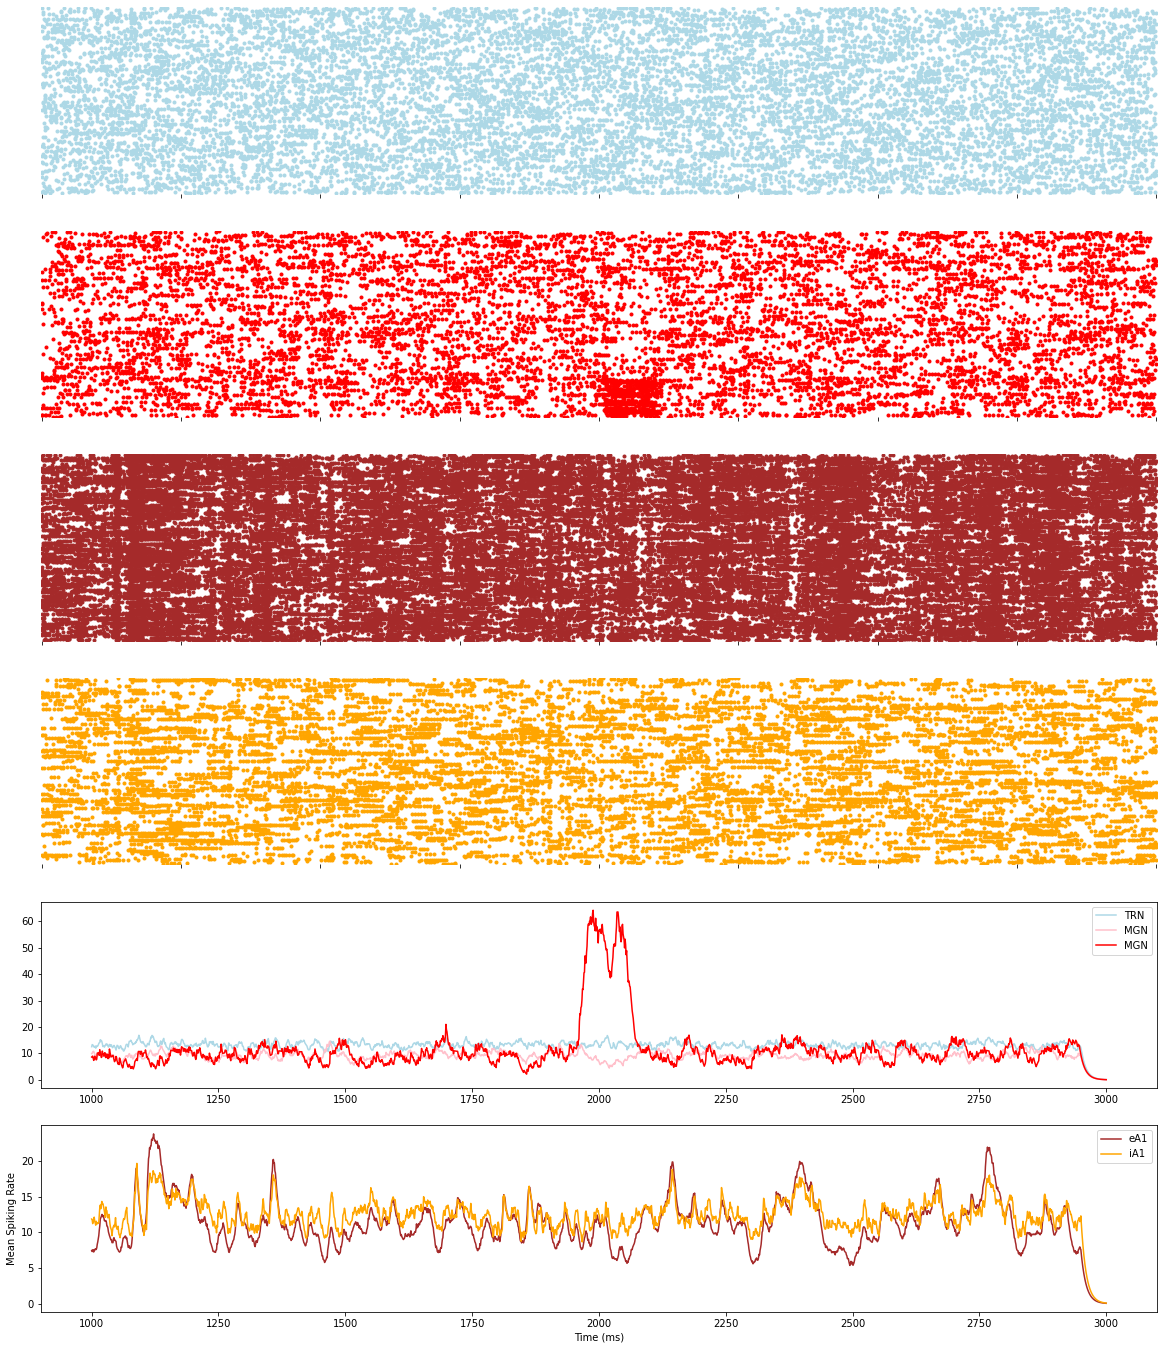

In [98]:
pth = "../demyelination/data/recurr-trn/activity/"
f = ['spk_recurr-trn_nuX_stim=50.0_b=10.0_tau_w_a1=150.0_T=1']

p = pd.read_pickle(pth + f[0])
fig, ax = plt.subplots(nrows=6, ncols=1)
fig.set_size_inches(20, 24)
#plt.ylim(0, 45)
#plt.title(f[0])

for x in range(4):
    ax[x].set_frame_on(False)
    ax[x].tick_params(labelbottom=False)
    ax[x].get_yaxis().set_ticks([])

tstart = 1000
tstop = 3000

neuron_idx_start = 1
stim_neuron_idx = 100

p.spikeobj['TRN'].time_slice(tstart, tstop).raster_plot(ax=ax[0], dt=10, display=False, color='lightblue')

# MGN Stim
p.spikeobj['MGN'].time_slice(tstart, tstop).raster_plot(ax=ax[1], dt=10, display=False, color='red')

# eA1 Stim
p.spikeobj['eA1'].time_slice(tstart, tstop).raster_plot(ax=ax[2], dt=10, display=False, color='brown')

p.spikeobj['iA1'].time_slice(tstart, tstop).raster_plot(ax=ax[3], dt=10, display=False, color='orange')

x, y = pipeline.smoothedspikes(p.spikeobj['TRN'].time_slice(tstart, tstop))
ax[4].plot(x, y, label='TRN', c='lightblue')

x, y = pipeline.smoothedspikes(p.spikeobj['MGN'].time_slice(tstart, tstop).id_slice(np.arange(101, 500)))
ax[4].plot(x, y, label='MGN', c='pink')

x, y = pipeline.smoothedspikes(p.spikeobj['MGN'].time_slice(tstart, tstop).id_slice(np.arange(1, 100)))
ax[4].plot(x, y, label='MGN', c='red')

x, y = pipeline.smoothedspikes(p.spikeobj['eA1'].time_slice(tstart, tstop).id_slice(np.arange(1400, 3000)))
ax[5].plot(x, y, label='eA1', c='brown')

x, y = pipeline.smoothedspikes(p.spikeobj['iA1'].time_slice(tstart, tstop))
ax[5].plot(x, y, label='iA1', c='orange')

plt.xlabel("Time (ms)")
plt.ylabel("Mean Spiking Rate")
#plt.axhline(25, c='brown', label="y=25")

#plt.xticks(range(0, 60+1, 10), range(tstart, tstop+1, 100))
ax[2].spines.right.set_visible(False)
ax[2].spines.top.set_visible(False)

ax[4].legend()
ax[5].legend()

#plt.show()

## recurr-trn-tonotopic
tonotopic.py <br />
Reproduction of input from Barna but with tonotopic connectivity b/w the MGN and the eA1

In [6]:
files = pipeline.readfiles("../demyelination/data/recurr-trn-tonotopic/activity/");
df = pipeline.preparestim_tonotopicdf(files)

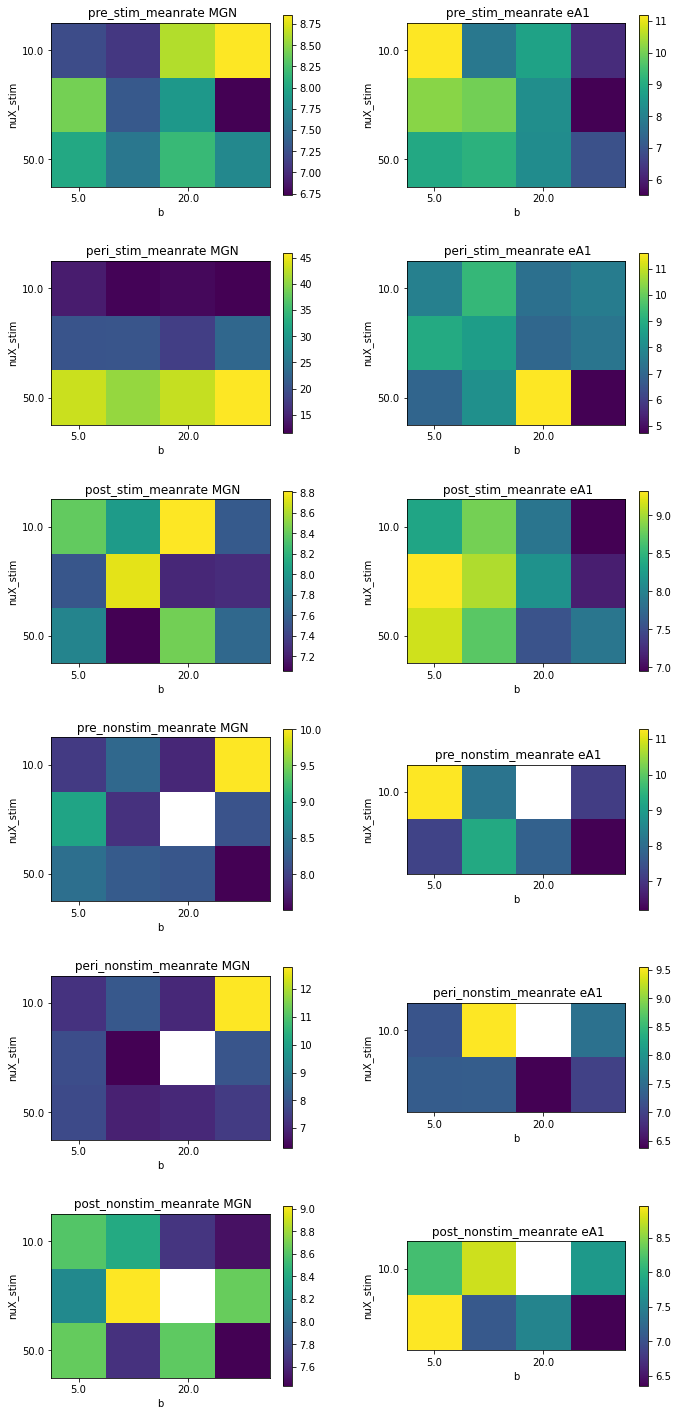

In [16]:
fig, ax = plt.subplots(nrows=6, ncols=2)

fig.set_size_inches(10, 20)
plt.subplots_adjust(left=0.01, right=0.03, top=0.03, bottom=0.02)

# dfFilter = df.nuX_stim == 10
dfFilter = [True] * df.shape[0]

varone = "nuX_stim"
vartwo = "b"

# parts = ["MGN", "TRN", 'eA1', "iA1"]
parts = ["MGN", 'eA1']

pipeline.makesubplot(df[dfFilter], fig, ax[0], "pre_stim_meanrate", varone, vartwo, parts)

pipeline.makesubplot(df[dfFilter], fig, ax[1], "peri_stim_meanrate", varone, vartwo, parts)

pipeline.makesubplot(df[dfFilter], fig, ax[2], "post_stim_meanrate", varone, vartwo, parts)

pipeline.makesubplot(df[dfFilter], fig, ax[3], "pre_nonstim_meanrate", varone, vartwo, parts)

pipeline.makesubplot(df[dfFilter], fig, ax[4], "peri_nonstim_meanrate", varone, vartwo, parts)

pipeline.makesubplot(df[dfFilter], fig, ax[5], "post_nonstim_meanrate", varone, vartwo, parts)

fig.tight_layout()

#plt.savefig("/home/pbr-student/Downloads/thesis-plots/adaptation-aone_winputaone=15.pdf")

Peri Stim 
MGN Stim, MGN Non Stim, eA1 Stim, eA1 Non Stim 
 42.92929292929293 7.067669172932331 11.654135338345865 10.306441525953721
Pre Stim 
MGN Stim, MGN Non Stim, eA1 Stim, eA1 Non Stim 
 42.92929292929293 7.067669172932331 11.654135338345865 10.306441525953721


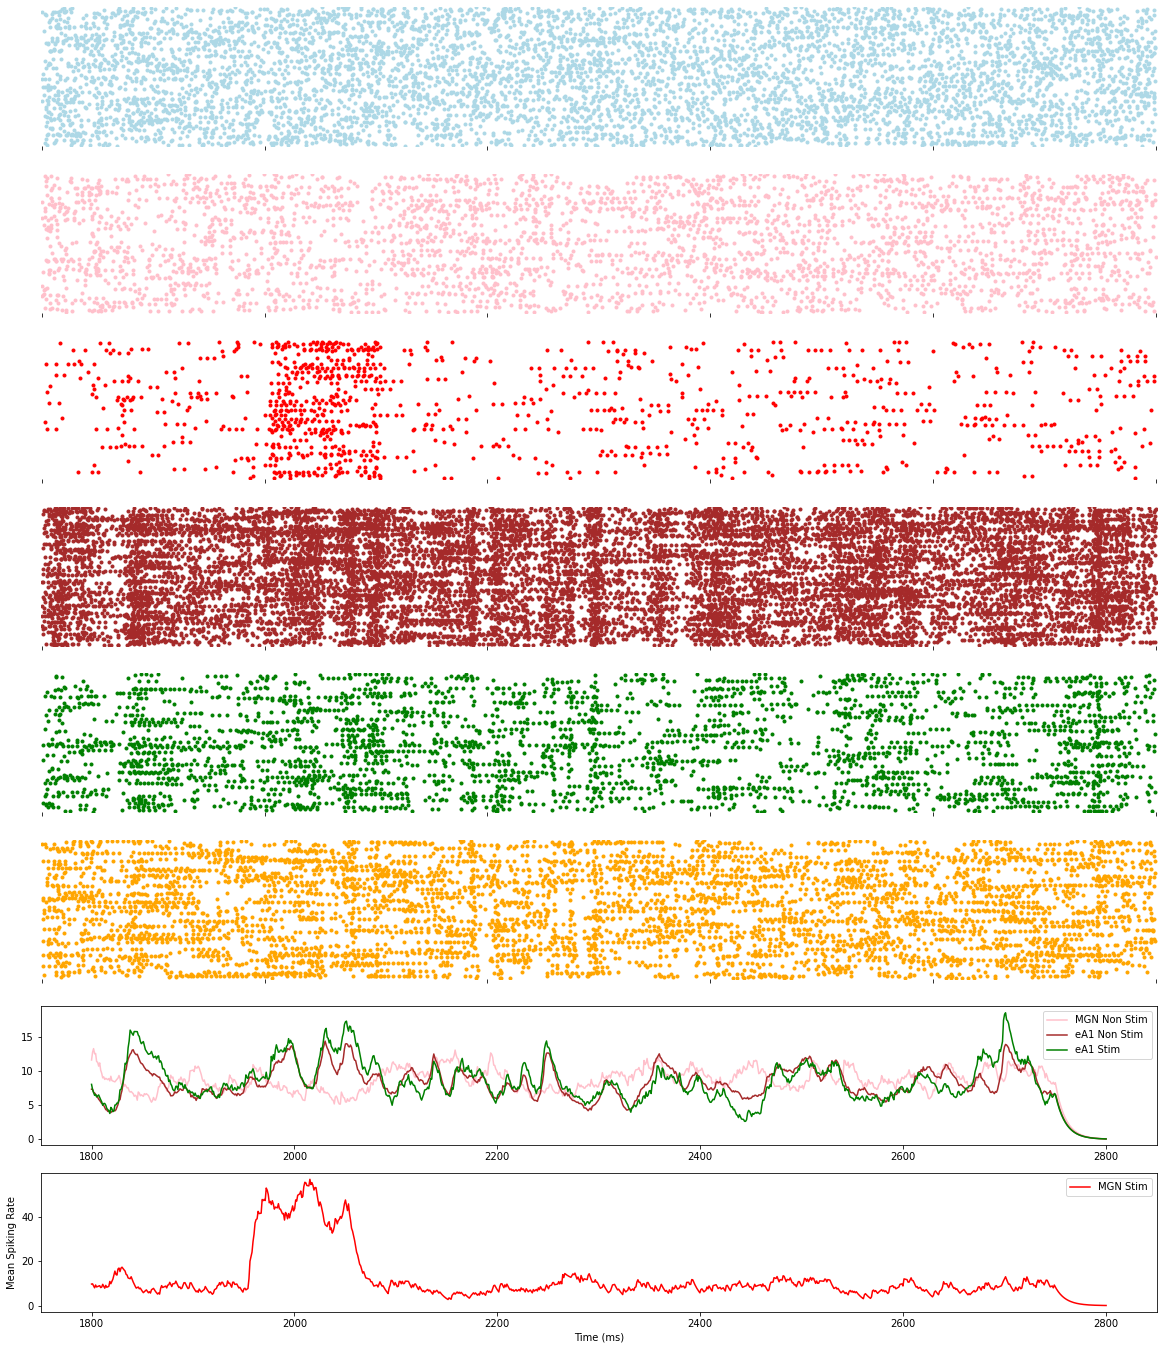

In [107]:
pth = "../demyelination/data/recurr-trn-tonotopic/activity/"
f = ['spk_recurr-trn-tonotopic_nuX_stim=50.0_b=20.0_tau_w_a1=150.0_T=1']

p = pd.read_pickle(pth + f[0])
fig, ax = plt.subplots(nrows=8, ncols=1)
fig.set_size_inches(20, 24)
#plt.ylim(0, 45)
#plt.title(f[0])

for x in range(6):
    ax[x].set_frame_on(False)
    ax[x].tick_params(labelbottom=False)
    ax[x].get_yaxis().set_ticks([])

tstart = 1800
tstop = 2800

neuron_idx_start = 1
stim_neuron_idx = 100

p.spikeobj['TRN'].time_slice(tstart, tstop).raster_plot(ax=ax[0], dt=10, display=False, color='lightblue')

# MGN NON Stim
p.spikeobj['MGN'].time_slice(tstart, tstop)\
    .id_slice(np.arange(101, 500)).raster_plot(ax=ax[1], dt=10, display=False, color='pink')

# MGN Stim
p.spikeobj['MGN'].time_slice(tstart, tstop)\
    .id_slice(np.arange(1, 100)).raster_plot(ax=ax[2], dt=10, display=False, color='red')

# eA1 NON Stim
p.spikeobj['eA1'].time_slice(tstart, tstop)\
    .id_slice(np.arange(1401, 3000)).raster_plot(ax=ax[3], dt=10, display=False, color='brown')

# eA1 Stim
p.spikeobj['eA1'].time_slice(tstart, tstop)\
    .id_slice(np.arange(1001, 1400)).raster_plot(ax=ax[4], dt=10, display=False, color='green')

p.spikeobj['iA1'].time_slice(tstart, tstop).raster_plot(ax=ax[5], dt=10, display=False, color='orange')

x, y = pipeline.smoothedspikes(p.spikeobj['TRN'].time_slice(tstart, tstop))
# ax[6].plot(x, y, label='TRN', c='lightblue')

x, y = pipeline.smoothedspikes(p.spikeobj['MGN'].time_slice(tstart, tstop).id_slice(np.arange(101, 500)))
ax[6].plot(x, y, label='MGN Non Stim', c='pink')

x, y = pipeline.smoothedspikes(p.spikeobj['MGN'].time_slice(tstart, tstop).id_slice(np.arange(1, 100)))
ax[7].plot(x, y, label='MGN Stim', c='red')

x, y = pipeline.smoothedspikes(p.spikeobj['eA1'].time_slice(tstart, tstop).id_slice(np.arange(1401, 3000)))
ax[6].plot(x, y, label='eA1 Non Stim', c='brown')

x, y = pipeline.smoothedspikes(p.spikeobj['eA1'].time_slice(tstart, tstop).id_slice(np.arange(1001, 1400)))
ax[6].plot(x, y, label='eA1 Stim', c='green')

x, y = pipeline.smoothedspikes(p.spikeobj['iA1'].time_slice(tstart, tstop))
# ax[6].plot(x, y, label='iA1', c='orange')

plt.xlabel("Time (ms)")
plt.ylabel("Mean Spiking Rate")
#plt.axhline(25, c='brown', label="y=25")

#plt.xticks(range(0, 60+1, 10), range(tstart, tstop+1, 100))
ax[2].spines.right.set_visible(False)
ax[2].spines.top.set_visible(False)

ax[6].legend()
ax[7].legend()

#plt.show()

firingRates(p, (2000, 2100), "Peri Stim")
firingRates(p, (1900, 2000), "Pre Stim")


## recurr-trn-tono-diff-ctx-w
diff-ctx-w.py <br />
The propagation of the stimulus from the MGN to the CTX is not consistent or strong. In this experiment, a higher MGN->eA1 weight is explored.

In [95]:
files = pipeline.readfiles("../demyelination/data/recurr-trn-tono-diff-ctx-w/activity/");
parts = ["MGN", "TRN", 'eA1', "iA1"]
df = pipeline.preparestim_tonotopicdf(files, parts)

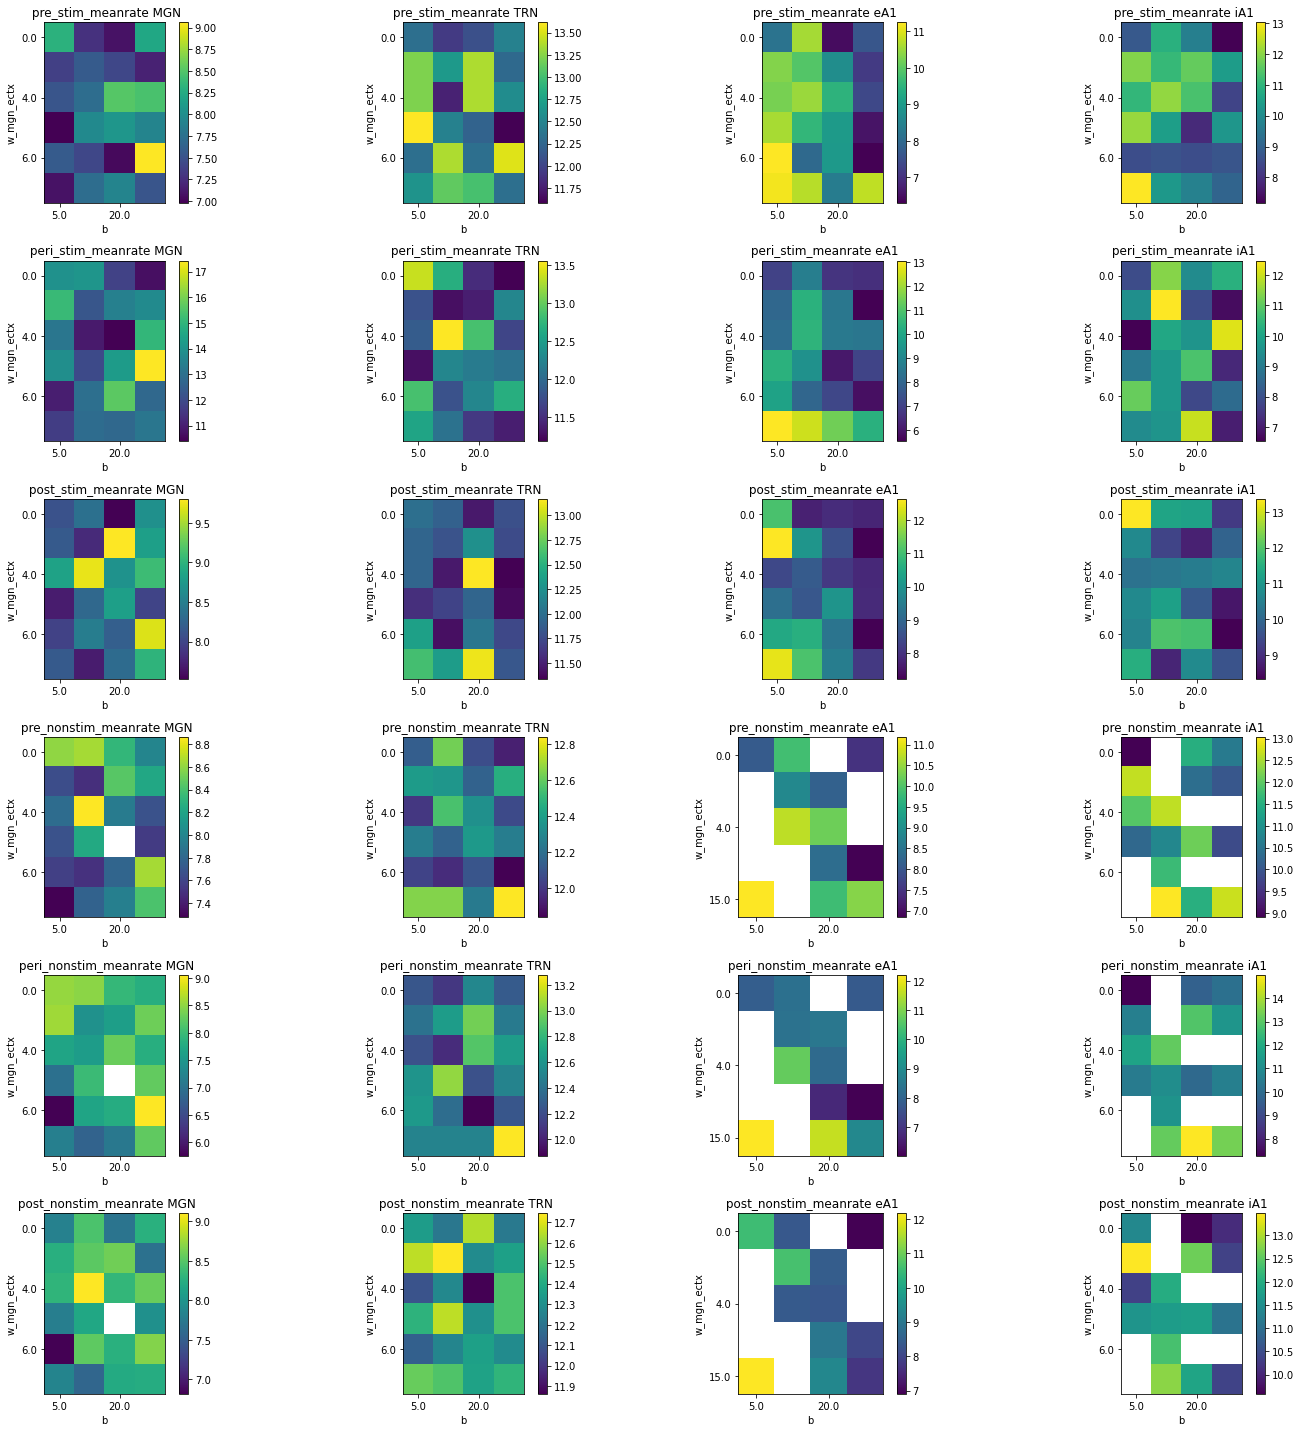

In [97]:
fig, ax = plt.subplots(nrows=6, ncols=4)

fig.set_size_inches(20, 20)
plt.subplots_adjust(left=0.01, right=0.03, top=0.03, bottom=0.02)

dfFilter = df.nuX_stim == 10
# dfFilter = [True] * df.shape[0]

varone = "w_mgn_ectx"
vartwo = "b"

parts = ["MGN", "TRN", 'eA1', "iA1"]
# parts = ["MGN", 'eA1']

pipeline.makesubplot(df[dfFilter], fig, ax[0], "pre_stim_meanrate", varone, vartwo, parts)

pipeline.makesubplot(df[dfFilter], fig, ax[1], "peri_stim_meanrate", varone, vartwo, parts)

pipeline.makesubplot(df[dfFilter], fig, ax[2], "post_stim_meanrate", varone, vartwo, parts)

pipeline.makesubplot(df[dfFilter], fig, ax[3], "pre_nonstim_meanrate", varone, vartwo, parts)

pipeline.makesubplot(df[dfFilter], fig, ax[4], "peri_nonstim_meanrate", varone, vartwo, parts)

pipeline.makesubplot(df[dfFilter], fig, ax[5], "post_nonstim_meanrate", varone, vartwo, parts)

fig.tight_layout()

#plt.savefig("/home/pbr-student/Downloads/thesis-plots/adaptation-aone_winputaone=15.pdf")

Peri Stim 
MGN Stim, MGN Non Stim, eA1 Stim, eA1 Non Stim 
 41.21212121212121 6.616541353383458 12.982456140350877 10.10006253908693
Pre Stim 
MGN Stim, MGN Non Stim, eA1 Stim, eA1 Non Stim 
 7.6767676767676765 8.922305764411028 8.972431077694235 9.562226391494685


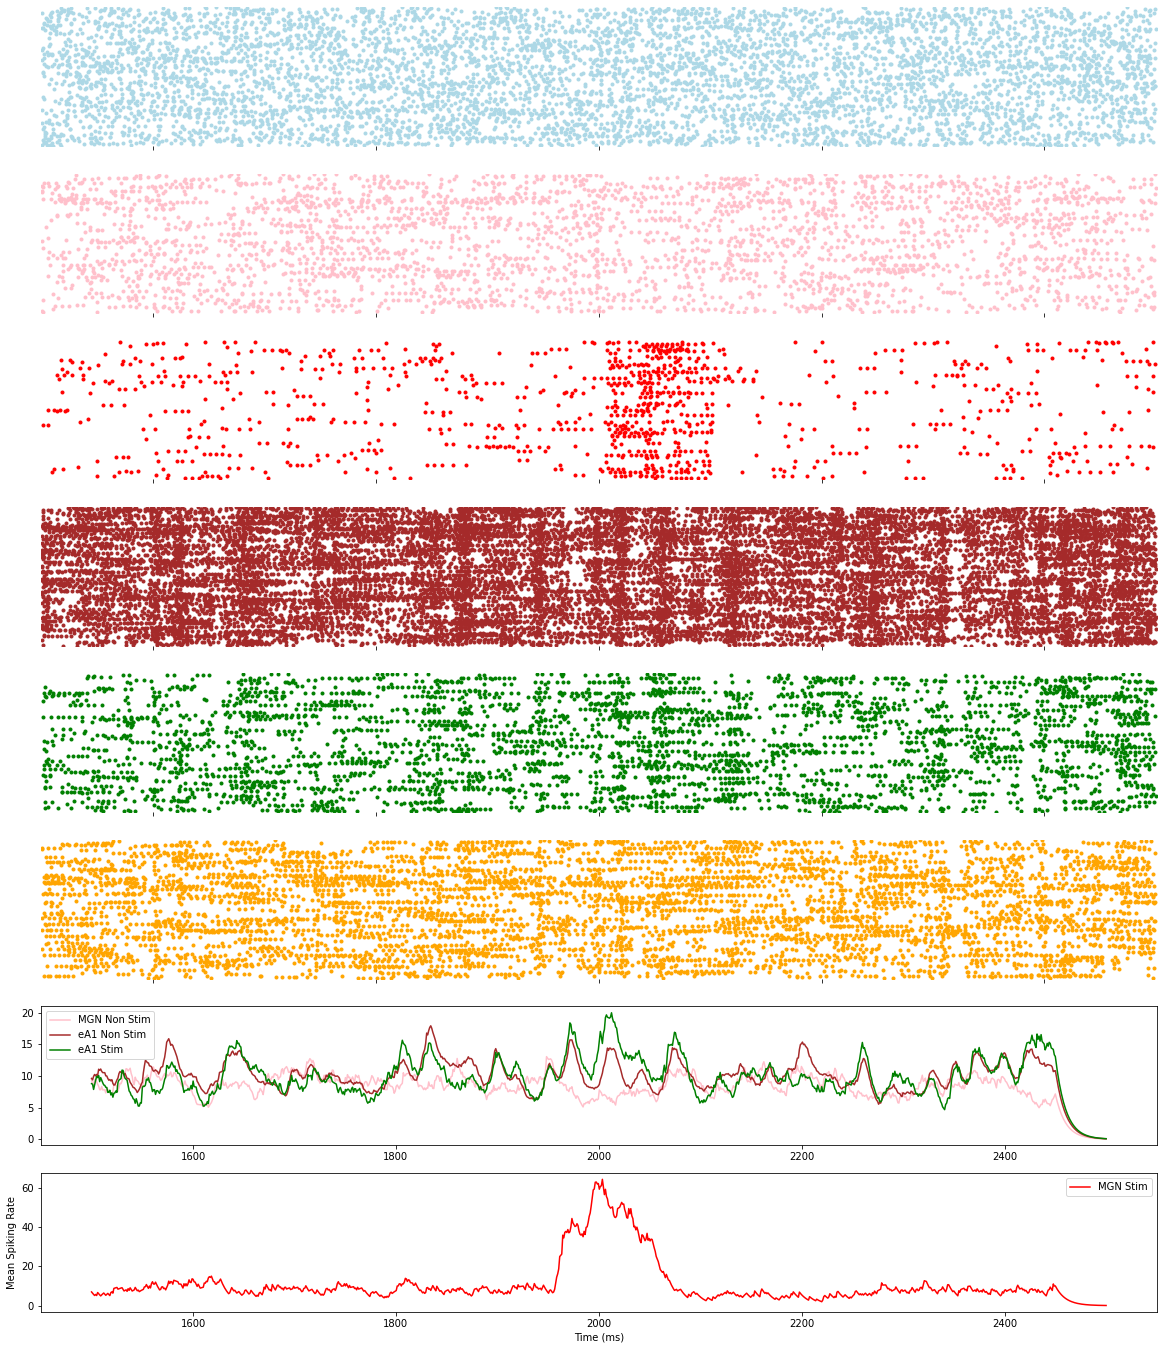

In [129]:
pth = "../demyelination/data/recurr-trn-tono-diff-ctx-w/activity/"
f = ['spk_recurr-trn-tono-diff-ctx-w_nuX_stim=50.0_b=20.0_w_mgn_ectx=15.0']

p = pd.read_pickle(pth + f[0])
fig, ax = plt.subplots(nrows=8, ncols=1)
fig.set_size_inches(20, 24)
#plt.ylim(0, 45)
#plt.title(f[0])

for x in range(6):
    ax[x].set_frame_on(False)
    ax[x].tick_params(labelbottom=False)
    ax[x].get_yaxis().set_ticks([])

tstart = 1500
tstop = 2500

neuron_idx_start = 1
stim_neuron_idx = 100

p.spikeobj['TRN'].time_slice(tstart, tstop).raster_plot(ax=ax[0], dt=10, display=False, color='lightblue')

# MGN NON Stim
p.spikeobj['MGN'].time_slice(tstart, tstop)\
    .id_slice(np.arange(101, 500)).raster_plot(ax=ax[1], dt=10, display=False, color='pink')

# MGN Stim
p.spikeobj['MGN'].time_slice(tstart, tstop)\
    .id_slice(np.arange(1, 100)).raster_plot(ax=ax[2], dt=10, display=False, color='red')

# eA1 NON Stim
p.spikeobj['eA1'].time_slice(tstart, tstop)\
    .id_slice(np.arange(1401, 3000)).raster_plot(ax=ax[3], dt=10, display=False, color='brown')

# eA1 Stim
p.spikeobj['eA1'].time_slice(tstart, tstop)\
    .id_slice(np.arange(1001, 1400)).raster_plot(ax=ax[4], dt=10, display=False, color='green')

p.spikeobj['iA1'].time_slice(tstart, tstop).raster_plot(ax=ax[5], dt=10, display=False, color='orange')

x, y = pipeline.smoothedspikes(p.spikeobj['TRN'].time_slice(tstart, tstop))
# ax[6].plot(x, y, label='TRN', c='lightblue')

x, y = pipeline.smoothedspikes(p.spikeobj['MGN'].time_slice(tstart, tstop).id_slice(np.arange(101, 500)))
ax[6].plot(x, y, label='MGN Non Stim', c='pink')

x, y = pipeline.smoothedspikes(p.spikeobj['MGN'].time_slice(tstart, tstop).id_slice(np.arange(1, 100)))
ax[7].plot(x, y, label='MGN Stim', c='red')

x, y = pipeline.smoothedspikes(p.spikeobj['eA1'].time_slice(tstart, tstop).id_slice(np.arange(1400, 3000)))
ax[6].plot(x, y, label='eA1 Non Stim', c='brown')

x, y = pipeline.smoothedspikes(p.spikeobj['eA1'].time_slice(tstart, tstop).id_slice(np.arange(1001, 1400)))
ax[6].plot(x, y, label='eA1 Stim', c='green')

x, y = pipeline.smoothedspikes(p.spikeobj['iA1'].time_slice(tstart, tstop))
# ax[6].plot(x, y, label='iA1', c='orange')

plt.xlabel("Time (ms)")
plt.ylabel("Mean Spiking Rate")
#plt.axhline(25, c='brown', label="y=25")

#plt.xticks(range(0, 60+1, 10), range(tstart, tstop+1, 100))
ax[2].spines.right.set_visible(False)
ax[2].spines.top.set_visible(False)

ax[6].legend()
ax[7].legend()


firingRates(p, (2000, 2100), "Peri Stim")
firingRates(p, (1900, 2000), "Pre Stim")


## recurr-trn-denser-mgn-ctx
denser_mgn_ctx.py <br />
The connectivity from the MGN to the CTX is in this experiment 5% instead of 2.6%.

In [142]:
files = pipeline.readfiles("../demyelination/data/recurr-trn-denser-mgn-ctx/activity/");
parts = ["MGN", "TRN", 'eA1', "iA1"]
df = pipeline.preparestim_tonotopicdf(files, parts)

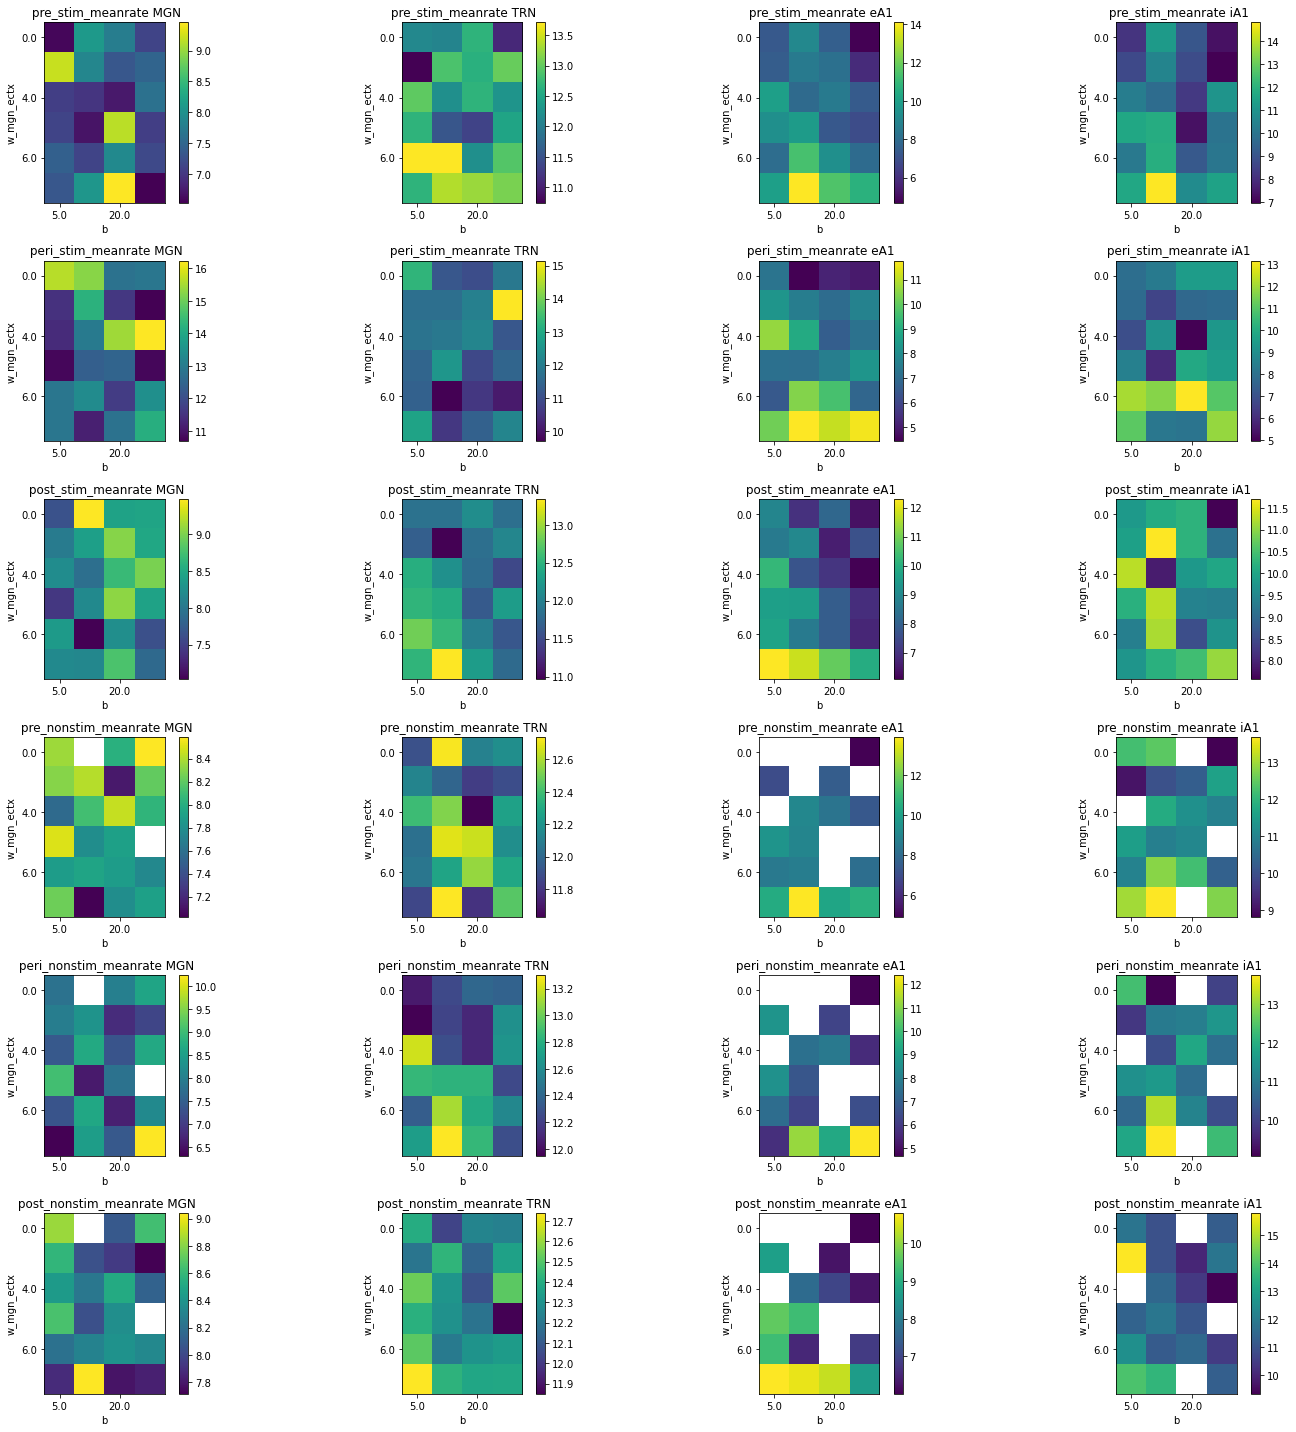

In [143]:
fig, ax = plt.subplots(nrows=6, ncols=4)

fig.set_size_inches(20, 20)
plt.subplots_adjust(left=0.01, right=0.03, top=0.03, bottom=0.02)

dfFilter = df.nuX_stim == 10
# dfFilter = [True] * df.shape[0]

varone = "w_mgn_ectx"
vartwo = "b"

parts = ["MGN", "TRN", 'eA1', "iA1"]
# parts = ["MGN", 'eA1']

pipeline.makesubplot(df[dfFilter], fig, ax[0], "pre_stim_meanrate", varone, vartwo, parts)

pipeline.makesubplot(df[dfFilter], fig, ax[1], "peri_stim_meanrate", varone, vartwo, parts)

pipeline.makesubplot(df[dfFilter], fig, ax[2], "post_stim_meanrate", varone, vartwo, parts)

pipeline.makesubplot(df[dfFilter], fig, ax[3], "pre_nonstim_meanrate", varone, vartwo, parts)

pipeline.makesubplot(df[dfFilter], fig, ax[4], "peri_nonstim_meanrate", varone, vartwo, parts)

pipeline.makesubplot(df[dfFilter], fig, ax[5], "post_nonstim_meanrate", varone, vartwo, parts)

fig.tight_layout()

#plt.savefig("/home/pbr-student/Downloads/thesis-plots/adaptation-aone_winputaone=15.pdf")

Pre Stim 
MGN Stim, MGN Non Stim, eA1 Stim, eA1 Non Stim 
 6.161616161616162 7.994987468671679 9.348370927318296 8.993120700437773
Peri Stim 
MGN Stim, MGN Non Stim, eA1 Stim, eA1 Non Stim 
 50.80808080808081 6.8922305764411025 13.107769423558898 7.661038148843027
Post Stim 
MGN Stim, MGN Non Stim, eA1 Stim, eA1 Non Stim 
 6.8686868686868685 7.493734335839599 11.278195488721805 10.612883051907442


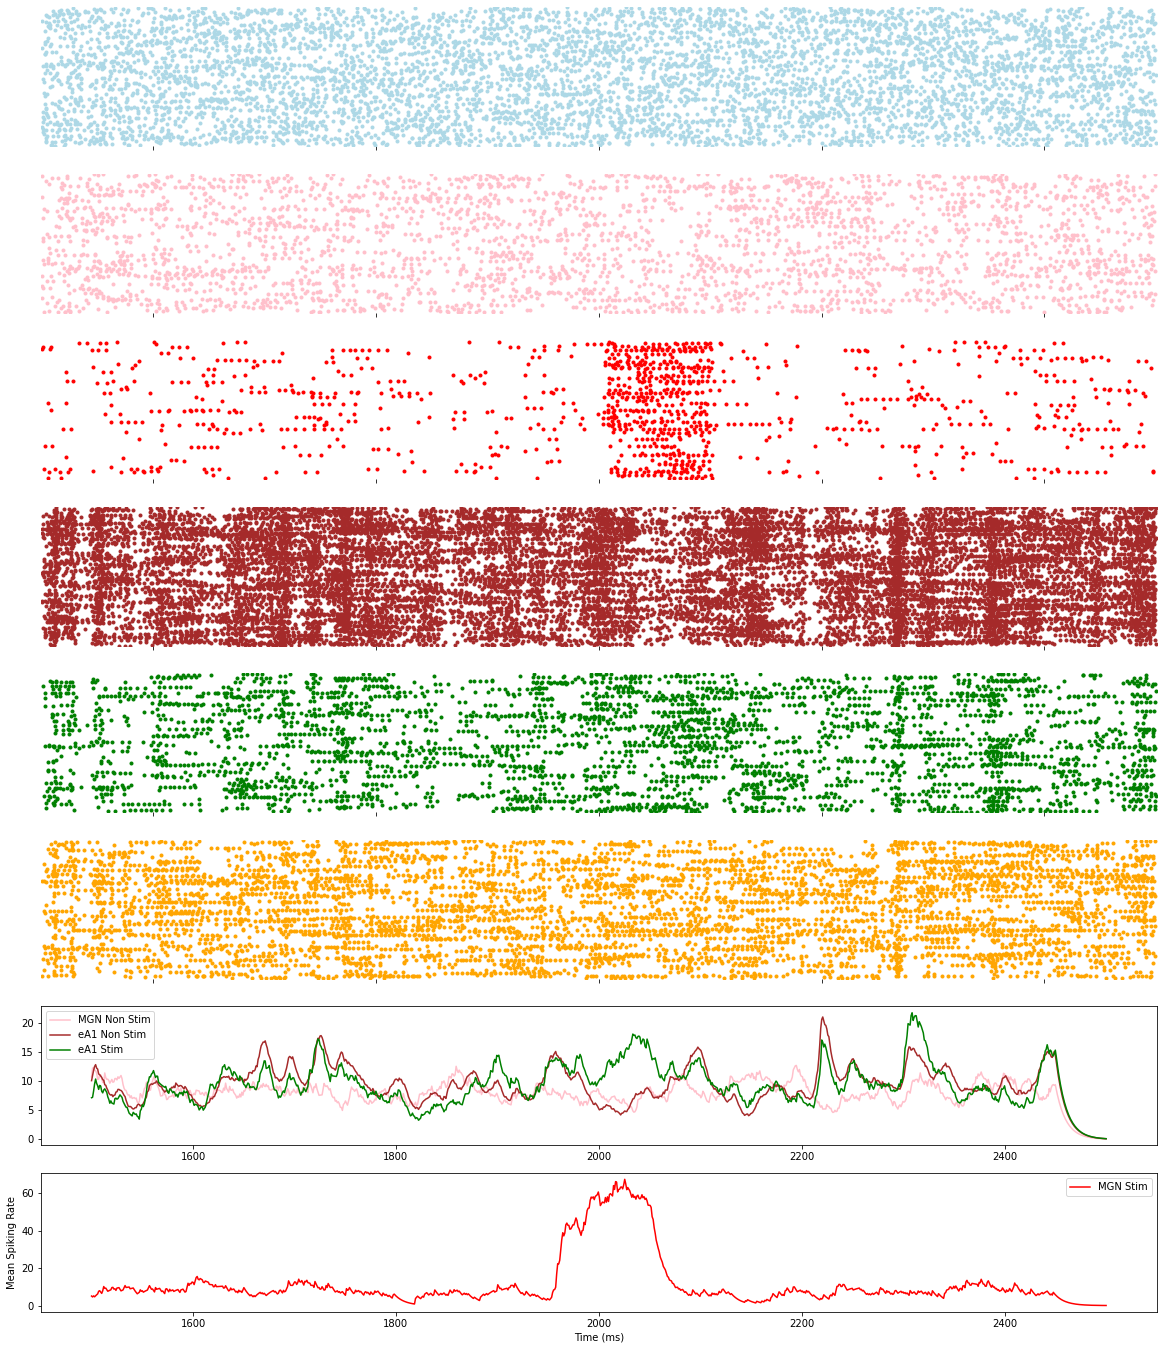

In [6]:
pth = "../demyelination/data/recurr-trn-denser-mgn-ctx/activity/"
f = ['spk_recurr-trn-denser-mgn-ctx_nuX_stim=50.0_b=5.0_w_mgn_ectx=6.0']

p = pd.read_pickle(pth + f[0])
fig, ax = plt.subplots(nrows=8, ncols=1)
fig.set_size_inches(20, 24)
#plt.ylim(0, 45)
#plt.title(f[0])

for x in range(6):
    ax[x].set_frame_on(False)
    ax[x].tick_params(labelbottom=False)
    ax[x].get_yaxis().set_ticks([])

tstart = 1500
tstop = 2500

neuron_idx_start = 1
stim_neuron_idx = 100

p.spikeobj['TRN'].time_slice(tstart, tstop).raster_plot(ax=ax[0], dt=10, display=False, color='lightblue')

# MGN NON Stim
p.spikeobj['MGN'].time_slice(tstart, tstop)\
    .id_slice(np.arange(101, 500)).raster_plot(ax=ax[1], dt=10, display=False, color='pink')

# MGN Stim
p.spikeobj['MGN'].time_slice(tstart, tstop)\
    .id_slice(np.arange(1, 100)).raster_plot(ax=ax[2], dt=10, display=False, color='red')

# eA1 NON Stim
p.spikeobj['eA1'].time_slice(tstart, tstop)\
    .id_slice(np.arange(1401, 3000)).raster_plot(ax=ax[3], dt=10, display=False, color='brown')

# eA1 Stim
p.spikeobj['eA1'].time_slice(tstart, tstop)\
    .id_slice(np.arange(1001, 1400)).raster_plot(ax=ax[4], dt=10, display=False, color='green')

p.spikeobj['iA1'].time_slice(tstart, tstop).raster_plot(ax=ax[5], dt=10, display=False, color='orange')

x, y = pipeline.smoothedspikes(p.spikeobj['TRN'].time_slice(tstart, tstop))
# ax[6].plot(x, y, label='TRN', c='lightblue')

x, y = pipeline.smoothedspikes(p.spikeobj['MGN'].time_slice(tstart, tstop).id_slice(np.arange(101, 500)))
ax[6].plot(x, y, label='MGN Non Stim', c='pink')

x, y = pipeline.smoothedspikes(p.spikeobj['MGN'].time_slice(tstart, tstop).id_slice(np.arange(1, 100)))
ax[7].plot(x, y, label='MGN Stim', c='red')

x, y = pipeline.smoothedspikes(p.spikeobj['eA1'].time_slice(tstart, tstop).id_slice(np.arange(1400, 3000)))
ax[6].plot(x, y, label='eA1 Non Stim', c='brown')

x, y = pipeline.smoothedspikes(p.spikeobj['eA1'].time_slice(tstart, tstop).id_slice(np.arange(1001, 1400)))
ax[6].plot(x, y, label='eA1 Stim', c='green')

x, y = pipeline.smoothedspikes(p.spikeobj['iA1'].time_slice(tstart, tstop))
# ax[6].plot(x, y, label='iA1', c='orange')

plt.xlabel("Time (ms)")
plt.ylabel("Mean Spiking Rate")
#plt.axhline(25, c='brown', label="y=25")

#plt.xticks(range(0, 60+1, 10), range(tstart, tstop+1, 100))
ax[2].spines.right.set_visible(False)
ax[2].spines.top.set_visible(False)

ax[6].legend()
ax[7].legend()


firingRates(p, (1900, 2000), "Pre Stim")
firingRates(p, (2000, 2100), "Peri Stim")
firingRates(p, (2300, 2400), "Post Stim")
